[[5 1 0 0]
 [0 8 0 0]
 [0 0 2 0]
 [0 0 0 4]]
K cross validation :
Accuracy: 83.33 %
Standard Deviation: 6.24 %
F1 Score: 0.95
Recall: 0.95
Precision: 0.96


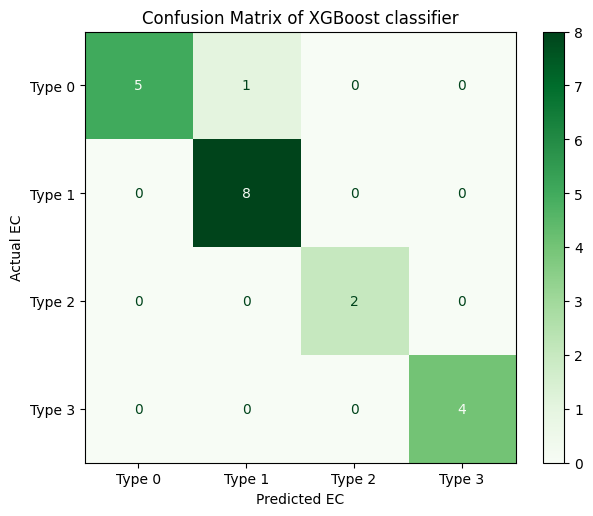

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv(r'C:\Users\ASUS\Dropbox\EIS\Code\Simulated EIS data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("K cross validation :")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = cm
fig, ax = plt.subplots(figsize=(7, 5.6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Type 0", "Type 1", "Type 2", "Type 3"])
disp.plot(cmap="Greens", ax=ax, values_format=".0f")
plt.xlabel("Predicted EC")
plt.ylabel("Actual EC")
plt.title("Confusion Matrix of XGBoost classifier")
plt.show()